### Problem 2.7

49
k = 1, acc = 0.6, error = 0.40, errs = 0.4
k = 2, acc = 0.62, error = 0.38, errs = 0.38
k = 3, acc = 0.68, error = 0.32, errs = 0.32
k = 4, acc = 0.7, error = 0.30, errs = 0.3
k = 5, acc = 0.7, error = 0.30, errs = 0.3
k = 6, acc = 0.7, error = 0.30, errs = 0.3
k = 7, acc = 0.7, error = 0.30, errs = 0.3
k = 8, acc = 0.7, error = 0.30, errs = 0.3
k = 9, acc = 0.72, error = 0.28, errs = 0.28
k = 10, acc = 0.68, error = 0.32, errs = 0.32
k = 11, acc = 0.64, error = 0.36, errs = 0.36
k = 12, acc = 0.6, error = 0.40, errs = 0.4
k = 13, acc = 0.64, error = 0.36, errs = 0.36
k = 14, acc = 0.68, error = 0.32, errs = 0.32
k = 15, acc = 0.7, error = 0.30, errs = 0.3
k = 16, acc = 0.7, error = 0.30, errs = 0.3
k = 17, acc = 0.68, error = 0.32, errs = 0.32
k = 18, acc = 0.7, error = 0.30, errs = 0.3
k = 19, acc = 0.66, error = 0.34, errs = 0.34
k = 20, acc = 0.72, error = 0.28, errs = 0.28
k = 21, acc = 0.7, error = 0.30, errs = 0.3
k = 22, acc = 0.72, error = 0.28, errs = 0.28
k = 23, acc = 0.

(9, 0.28)

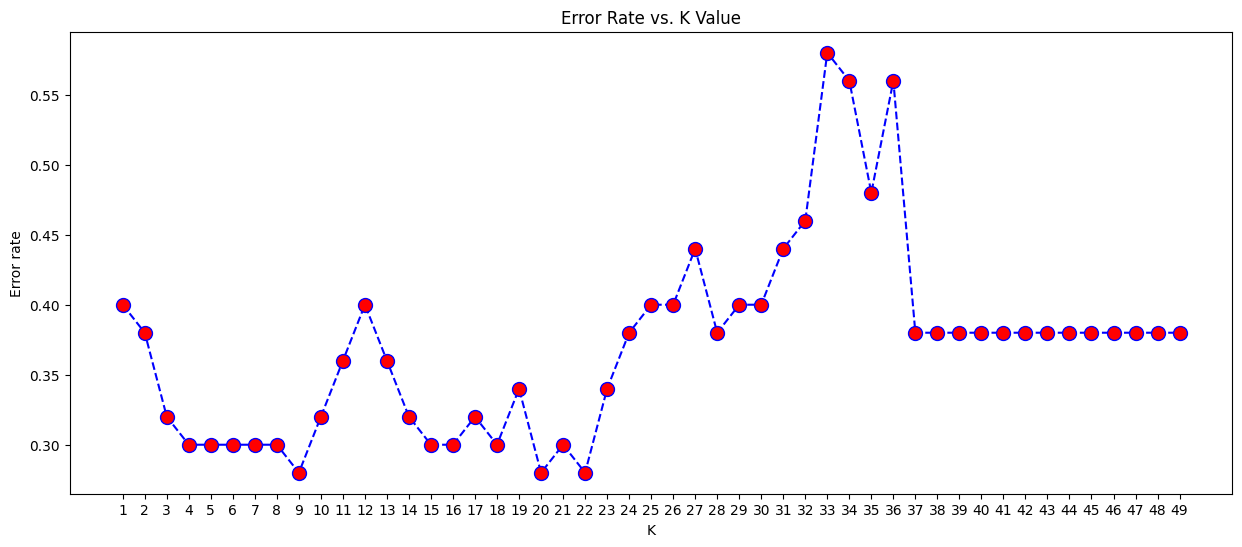

In [8]:
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df1 = pd.read_csv('obesity_election_2004.csv')
df1.columns = ['State', 'index', 'vote', 'abbrv']

## Use 2004 as train
# Convert the index str to float and save it as feature
df1['index'] = df1['index'].str.replace('%', '').astype(float) 
X = df1['index'].values.reshape(-1,1) 

# Convert Democrats to 0 and Repulicans to 1 
df1['vote'] = df1['vote'].map({'D': 0, 'R': 1}).values
y = df1['vote']

# Uses Leave one out cross validation to find the optimal k value
loo = LeaveOneOut()
k_vals = range(1,50)
acc_scores = []
errs = []
train_errs = []

for k in k_vals:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)  
    preds = []
    err = []
    train_preds = []
    train_err = []
        
    for i ,(train_index, test_index) in enumerate(loo.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # print(f"fold {i}")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")
        

        knn.fit(X_train, y_train)
        train_pred = knn.predict(X_train)
        pred = knn.predict(X_test)
        # print(f"k = {k} i = {i} pred = {pred}")
        preds.append(pred)
        train_preds.append(train_pred)
        train_err.append(np.mean([x != y for x, y in zip(train_pred, y_train)]))
        err.append((np.mean([x != y for x, y in zip(pred, y_test)])))
        
    acc = accuracy_score(y, preds)
    acc_scores.append(acc)
    errs.append(np.mean(err))
    train_errs.append(np.mean(train_err))

# err = [1 - acc for acc in acc_scores]
opt_k = k_vals[acc_scores.index(max(acc_scores))]
opt_acc = max(acc_scores)
res_err = 1 - opt_acc

print(len(acc_scores))

for i in k_vals :
    print(f"k = {i}, acc = {acc_scores[i-1]}, error = {1.00-acc_scores[i-1]:.2f}, errs = {errs[i-1]}" )

plt.figure(figsize=(15,6))
plt.plot(k_vals, errs,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
# plt.plot(k_vals, train_errs,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.xticks(k_vals)

opt_k, res_err


- When k = 9, the model has lowest resampling error with 28%
- Use this model to predict the 2000's data

In [6]:
df2 = pd.read_csv('obesity_election_2000.csv')
df2.columns = ['State', 'index', 'vote', 'abbv']

df2['index'] = df2['index'].str.replace('%', '').astype(float) 
X_test = df2['index'].values.reshape(-1,1) 

df2['vote'] = df2['vote'].map({'D': 0, 'R': 1}).values
y_test = df2['vote']

opt_ks = [9,20,22]
for opt_k in opt_ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors= opt_k)
    knn.fit(X, y) # take 2004 as training data
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    test_err = 1 - acc

    print(test_err)


0.5
0.54
0.54


- The test error rate is 50% 

### Problem 2.8


k = 1, acc = 0.58, error = 0.42
k = 2, acc = 0.56, error = 0.44
k = 3, acc = 0.58, error = 0.42
k = 4, acc = 0.58, error = 0.42
k = 5, acc = 0.58, error = 0.42
k = 6, acc = 0.5, error = 0.50
k = 7, acc = 0.6, error = 0.40
k = 8, acc = 0.48, error = 0.52
k = 9, acc = 0.58, error = 0.42
k = 10, acc = 0.56, error = 0.44
k = 11, acc = 0.54, error = 0.46
k = 12, acc = 0.62, error = 0.38
k = 13, acc = 0.58, error = 0.42
k = 14, acc = 0.6, error = 0.40
k = 15, acc = 0.6, error = 0.40
k = 16, acc = 0.62, error = 0.38
k = 17, acc = 0.6, error = 0.40
k = 18, acc = 0.6, error = 0.40
k = 19, acc = 0.52, error = 0.48
k = 20, acc = 0.58, error = 0.42
k = 21, acc = 0.5, error = 0.50
k = 22, acc = 0.58, error = 0.42
k = 23, acc = 0.6, error = 0.40
k = 24, acc = 0.62, error = 0.38
k = 25, acc = 0.62, error = 0.38
k = 26, acc = 0.62, error = 0.38
k = 27, acc = 0.62, error = 0.38
k = 28, acc = 0.62, error = 0.38
k = 29, acc = 0.62, error = 0.38
k = 30, acc = 0.6, error = 0.40
k = 31, acc = 0.56, error = 

(12, 0.38)

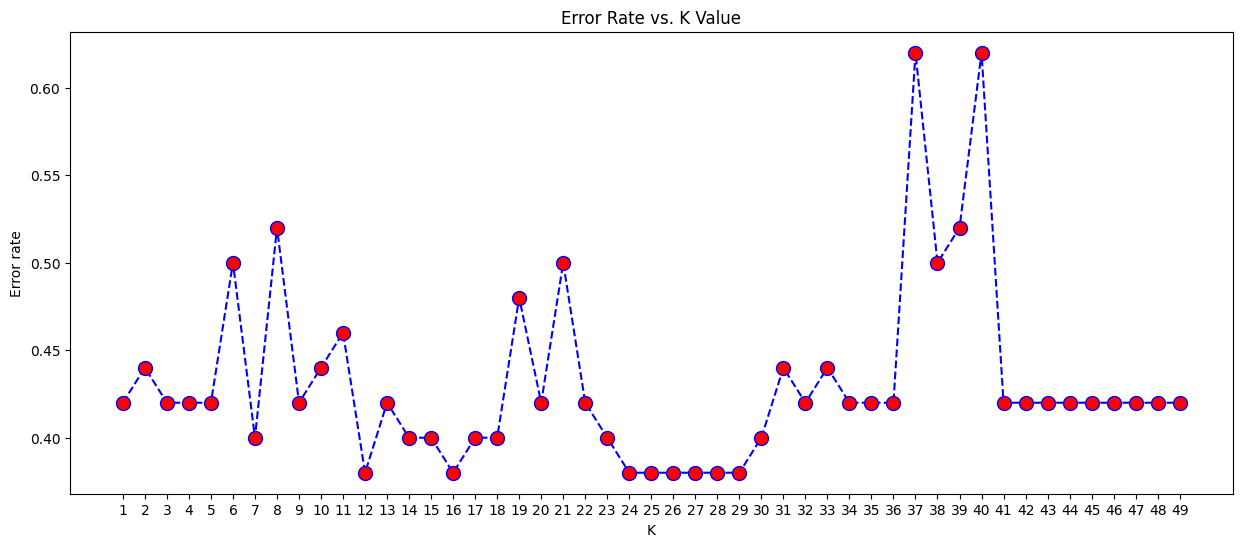

In [27]:
## Uses 2000 as train
df1 = pd.read_csv('obesity_election_2000.csv') 
df1.columns = ['State', 'index', 'vote', 'abbv']

# Convert the index str to float and save it as feature
df1['index'] = df1['index'].str.replace('%', '').astype(float) 
X = df1['index'].values.reshape(-1,1) 

# Convert Democrats to 0 and Repulicans to 1 
df1['vote'] = df1['vote'].map({'D': 0, 'R': 1}).values
y = df1['vote']

# Uses Leave one out cross validation to find the optimal k value
loo = LeaveOneOut()
k_vals = range(1,50)
acc_scores = []

for k in k_vals:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)  
    preds = []
        
    for i ,(train_index, test_index) in enumerate(loo.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # print(f"fold {i}")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")

        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        # print(f"k = {k} i = {i} pred = {pred}")
        preds.append(pred)
        
        
    acc = accuracy_score(y, preds)
    acc_scores.append(acc)
    
err = [1 - acc for acc in acc_scores ]
opt_k = k_vals[acc_scores.index(max(acc_scores))]
opt_acc = max(acc_scores)
res_err = 1 - opt_acc
for i in k_vals :
    print(f"k = {i}, acc = {acc_scores[i-1]}, error = {1.00-acc_scores[i-1]:.2f}" )



plt.figure(figsize=(15,6))
plt.plot(k_vals, err,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.xticks(k_vals)

    
opt_k, res_err


- This time the resampling error rate is 38%, with optimal k = 12

In [43]:
df2 = pd.read_csv('obesity_election_2004.csv')
df2.columns = ['State', 'index', 'vote', 'abbv']

df2['index'] = df2['index'].str.replace('%', '').astype(float) 
X_test = df2['index'].values.reshape(-1,1) 

df2['vote'] = df2['vote'].map({'D': 0, 'R': 1}).values
y_test = df2['vote']


knn = neighbors.KNeighborsClassifier(n_neighbors= opt_k)
knn.fit(X, y) # take 2004 as training data
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
test_err = 1 - acc

test_err

0.38

- We got a same test error rate as the resamplng one

### Problem 2.11
The data consists of n = 10 samples, (x, y), where x is uniformly distributed in [0,1] 
y = x^2 + 0.1x + noise and the noise has Gaussian distributionN(0, 0.25).
The noise has variance 0.25 or standard deviation 0.5.

,m,Empirical Risk (MSE),Schwarz Criterion,Estimated error
0,1,0.194779,1.575646,0.306903
1,2,0.186832,1.986822,0.371201
2,3,0.185393,2.535057,0.469981
3,4,0.172985,3.302585,0.571297
4,5,0.168368,4.453878,0.749892
5,6,0.168365,6.372699,1.072941
6,7,0.102928,10.210340,1.050932
7,8,0.012647,21.723266,0.274730


Optimal model complexity (m+1): 8


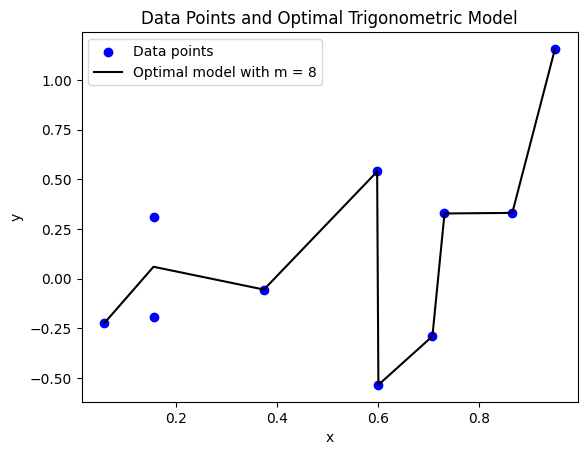

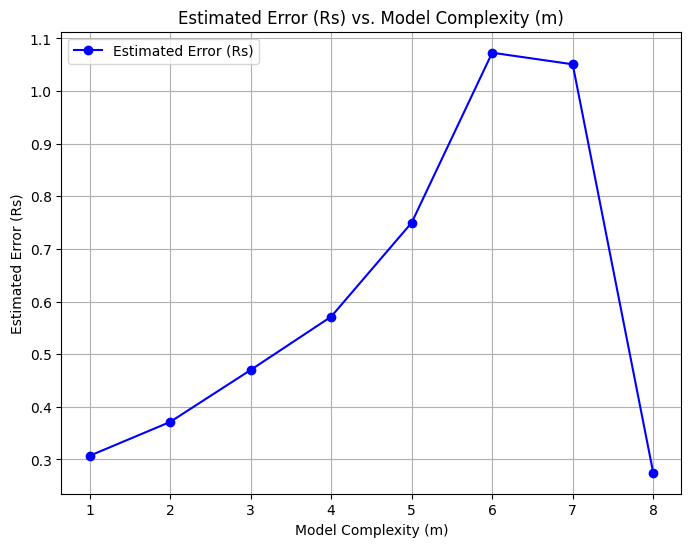

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import display

np.random.seed(42)
x = np.random.uniform(0, 1, 10)
x.sort()
noise = np.random.normal(0, np.sqrt(0.25), 10)
y = x**2 + 0.1 * x + noise

emps = []
SCs = [] # Schwarz criterion
Rs = [] # estimated risk 
complexities = range(1, 9)  
for m in complexities:
    # Feature matrix for trigonometric terms
    X = np.column_stack([np.cos(2 * np.pi * i * x) for i in range(1, m + 1)])
    # Bias term (w_0), all ones
    X = np.column_stack([np.ones(x.shape), X])
    # print(f"m = {m}, X = {X}\n")
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate empirical risk (MSE)
    mse = np.mean((y - y_pred) ** 2)
    emps.append(mse)

    # Schwarz criterion
    n = len(x)
    # SCs = [(1 + (m + 1) / n * np.log(n)) for m in complexities]
    # Rs = [emp * (1 + (m + 1) / n * np.log(n)) for m, emp in zip(complexities, emps)]
    SC = 1 + (m + 1) / (n - (m+1)) * np.log(n)
    SCs.append(SC)
    Rs.append(mse * SC)  # Store estimated risk for the current m
    
results_df = pd.DataFrame({
    'm': complexities,
    'Empirical Risk (MSE)': emps,
    'Schwarz Criterion': SCs,
    'Estimated error': Rs
})
pd.set_option('display.float_format', '{:.6f}'.format)
display(results_df)


# Find optpimal m 
optimal_m = complexities[np.argmin(Rs)]
print("Optimal model complexity (m+1):", optimal_m)

X_optimal = np.column_stack([np.cos(2 * np.pi * i * x) for i in range(1, optimal_m + 1)])
X_optimal = np.column_stack([np.ones(x.shape), X_optimal])

# Fit the model
model_optimal = LinearRegression()
model_optimal.fit(X_optimal, y)
y_pred_optimal = model_optimal.predict(X_optimal)

plt.scatter(x, y, color='blue', label='Data points' )
plt.plot(x, y_pred_optimal, color='black', label=f"Optimal model with m = {optimal_m}" )

plt.title('Data Points and Optimal Trigonometric Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(complexities, Rs, marker='o', linestyle='-', color='blue', label='Estimated Error (Rs)')

# Add titles and labels
plt.title('Estimated Error (Rs) vs. Model Complexity (m)')
plt.xlabel('Model Complexity (m)')
plt.ylabel('Estimated Error (Rs)')
plt.xticks(complexities)  # Ensure all m values are on the x-axis
plt.legend()
plt.grid(True)
plt.show()

,m,Empirical Risk (MSE),Estimated error
0,1,0.385221,0.606972
1,2,0.322752,0.641250
2,3,0.233013,0.590702
3,4,0.208823,0.689657
4,5,0.199553,0.888785
5,6,0.192429,1.226289
6,7,0.080256,0.819436
7,8,0.021506,0.467188


Optimal model complexity (m+1): 8
[0.05808361 0.15599452 0.15601864 0.37454012 0.59865848 0.60111501
 0.70807258 0.73199394 0.86617615 0.95071431] [-0.05727767  0.82253606  0.82445518  0.18532277  0.16056249 -0.91628702
 -0.85320964  0.55566285 -0.08436772  0.72951705]


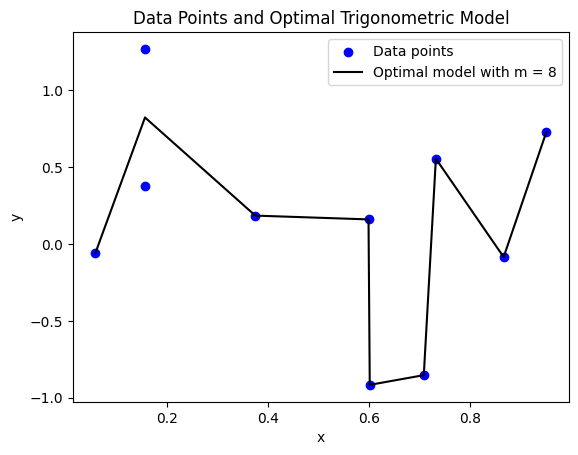

In [72]:
np.random.seed(42)
x = np.random.uniform(0, 1, 10)
noise = np.random.normal(0, np.sqrt(0.25), 10)
y = x**2 + 0.1 * x + noise
x.sort()

# Initialize lists to store results
errors = []
schwarz_criterion = []
complexities = range(1,9)

for m in complexities:
    # Create polynomial features up to degree m
    X_poly = np.column_stack([x**i for i in range(m + 1)])

    # Fit polynomial model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    # Calculate empirical risk (MSE)
    mse = np.mean((y - y_pred) ** 2)
    errors.append(mse)
    
    # Apply Schwarz Criterion
    # criterion = mse * (1 + (m + 1) / len(x) * np.log(len(x)))
    criterion = mse * (1 + (m + 1) / (len(x) - (m+1)) * np.log(len(x)))
    schwarz_criterion.append(criterion)

# Find optimal model complexity
optimal_m = complexities[np.argmin(schwarz_criterion)]


results_df = pd.DataFrame({
    'm': complexities,
    'Empirical Risk (MSE)': errors,
    'Estimated error': schwarz_criterion
})

pd.set_option('display.float_format', '{:.6f}'.format)
display(results_df)



# Find optpimal m 
optimal_m = complexities[np.argmin(schwarz_criterion)]
print("Optimal model complexity (m+1):", optimal_m)

X_optimal = np.column_stack([np.cos(2 * np.pi * i * x) for i in range(1, optimal_m + 1)])
X_optimal = np.column_stack([np.ones(x.shape), X_optimal])

# Fit the model
model_optimal = LinearRegression()
model_optimal.fit(X_optimal, y)
y_pred_optimal = model_optimal.predict(X_optimal)

print(x ,y_pred_optimal)
plt.scatter(x, y, color='blue', label='Data points' )
plt.plot(x, y_pred_optimal, color='black', label=f"Optimal model with m = {optimal_m}" )

plt.title('Data Points and Optimal Trigonometric Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Trigonometric Model Results:


,m,Empirical Risk (MSE),Schwarz Criterion,Estimated error
0,1,0.139651,1.575646,0.220040
1,2,0.139640,1.986822,0.277441
2,3,0.137570,2.535057,0.348749
3,4,0.124946,3.302585,0.412644
4,5,0.028268,4.453878,0.125903
5,6,0.028211,6.372699,0.179783
6,7,0.002352,10.210340,0.024015
7,8,0.000134,21.723266,0.002921



Polynomial Model Results:


,m,Empirical Risk (MSE),Schwarz Criterion,Estimated error,fpe
0,1,0.143374,1.575646,0.225906,1.500000
1,2,0.134883,1.986822,0.267989,1.857143
2,3,0.131632,2.535057,0.333695,2.333333
3,4,0.122657,3.302585,0.405084,3.000000
4,5,0.117189,4.453878,0.521947,4.000000
5,6,0.115569,6.372699,0.736489,5.666667
6,7,0.100947,10.210340,1.030700,9.000000
7,8,0.079026,21.723266,1.716701,19.000000


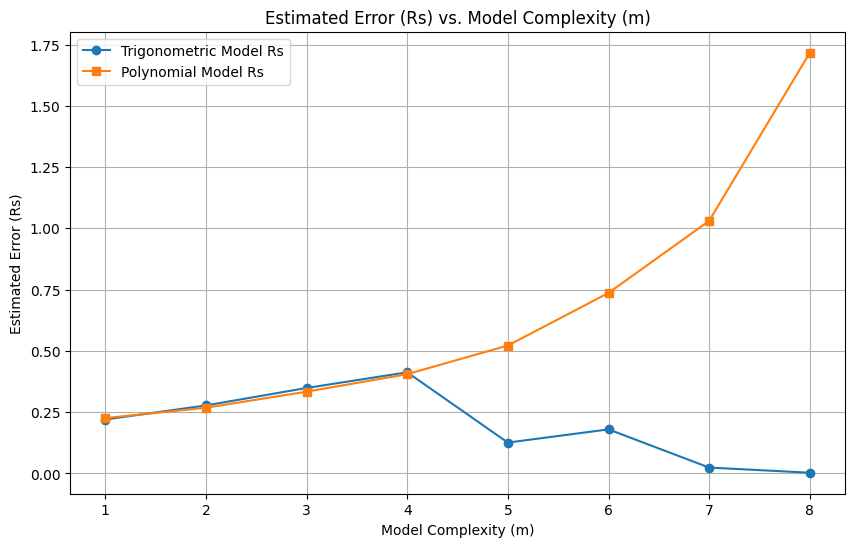

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from IPython.display import display

# Function to generate data
def generate_data(n=10, seed=42):
    # np.random.seed(seed)
    x = np.random.uniform(0, 1, n)
    x.sort()
    noise = np.random.normal(0, np.sqrt(0.25), n)
    y = x**2 + 0.1 * x + noise
    return x, y

# Function to calculate SC
def schwarz_criterion(DoF, n):
    p = DoF / n
    return (1 + p * ((1-p) ** -1) * np.log(n)) 

# Function to calculate FPE
def FPE(DoF, n):
    p = DoF / n
    return (1 + p) * ((1 - p) ** -1)

# Function to fit trigonometric model and calculate metrics
def fit_trig_model(x, y, complexities):
    emps, SCs, Rs = [], [], []
    n = len(x)
    
    for m in complexities:
        X = np.column_stack([np.cos(2 * np.pi * i * x) for i in range(1, m + 1)])
        X = np.column_stack([np.ones(x.shape), X])
        
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        
        mse = np.mean((y - y_pred) ** 2)
        SC = schwarz_criterion(m+1, n)
        
        emps.append(mse)
        SCs.append(SC)
        Rs.append(mse * SC)
    
    results_df = pd.DataFrame({'m': complexities, 'Empirical Risk (MSE)': emps, 
                               'Schwarz Criterion': SCs, 'Estimated error': Rs})
    return results_df

# Function to fit polynomial model and calculate metrics
def fit_poly_model(x, y, complexities):
    emps, SCs, Rs = [], [], []
    FPEs = []
    n = len(x)
    
    for m in complexities:
        X_poly = np.column_stack([x**i for i in range(m + 1)])
        
        model = LinearRegression()
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        
        mse = np.mean((y - y_pred) ** 2)
        SC = schwarz_criterion(m+1, n)
        fpe = FPE(m+1, n)
        
        emps.append(mse)
        SCs.append(SC)
        Rs.append(mse * SC)
        FPEs.append(fpe)
    
    results_df = pd.DataFrame({'m': complexities, 'Empirical Risk (MSE)': emps, 
                               'Schwarz Criterion': SCs, 'Estimated error': Rs,
                               'fpe': FPEs})
    return results_df

# Function to plot results for both models
def plot_results(trig_df, poly_df):
    plt.figure(figsize=(10, 6))
    plt.plot(trig_df['m'], trig_df['Estimated error'], 'o-', label='Trigonometric Model Rs')
    plt.plot(poly_df['m'], poly_df['Estimated error'], 's-', label='Polynomial Model Rs')
    
    plt.title('Estimated Error (Rs) vs. Model Complexity (m)')
    plt.xlabel('Model Complexity (m)')
    plt.ylabel('Estimated Error (Rs)')
    plt.xticks(trig_df['m'])
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_mean_over_iterations(iterations, complexities):
    trig_results = []
    poly_results = []

    for _ in range(iterations):
        x, y = generate_data()
        
        # Append results to the list
        trig_results.append(fit_trig_model(x, y, complexities))
        poly_results.append(fit_poly_model(x, y, complexities))

    # Concatenate all results and then calculate mean
    trig_df = pd.concat(trig_results).groupby('m').mean().reset_index()
    poly_df = pd.concat(poly_results).groupby('m').mean().reset_index()

    return trig_df, poly_df

# Main function to generate data, fit models, and plot results
def main():
    # x, y = generate_data()
    # complexities = range(1, 9)
    
    # trig_df = fit_trig_model(x, y, complexities)
    # poly_df = fit_poly_model(x, y, complexities)

    iterations = 1
    complexities = range(1, 9)
    
    # Calculate mean results over iterations
    trig_df, poly_df = calculate_mean_over_iterations(iterations, complexities)

    print("Trigonometric Model Results:")
    display(trig_df)
    print("\nPolynomial Model Results:")
    display(poly_df)
    
    plot_results(trig_df, poly_df)

# Execute the main function
if __name__ == "__main__":
    main()


### Problem 2.12

In [88]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def generate_data():
    np.random.seed(42)
    x = np.random.uniform(0, 1, 10)
    x.sort()
    noise = np.random.normal(0, np.sqrt(0.25), 10)
    y = x**2 + 0.1 * x + noise
    return x, y

def trig_func(x, m):
    Xtri = np.column_stack([np.cos(2 * np.pi * i * x) for i in range(1, m + 1)])
    return Xtri

def poly_func(x, m):
    Xpoly = np.column_stack([x**i for i in range(m + 1)])
    return Xpoly

def schwarz_criterion(DoF, n, Remp):
    p = DoF / n
    # return Remp * (1 + (DoF + 1) / n * np.log(len(x)))
    # criterion = mse * (1 + (m + 1) / (len(x) - (m+1)) * np.log(len(x)))
    return (1 + p * ((1-p) ** -1) * np.log(n)) * Remp

def train(x, y, func):
    kf = KFold(n_splits=5)
    # Est_r = []
    # emps = []
    # complexities = range(1, 8)
    # for m in complexities:
    #     model = LinearRegression()
    #     model.fit(func(x, m), y)
    #     y_pred = model.predict(func(x, m))
    #     emp = np.mean((y - y_pred) ** 2)
    #     emps.append(emp)
    #     Est_r.append(schwarz_criterion(m, sample_size, emp))
    
    # Est_r_formatted = ', '.join([f"{value:.6f}" for value in Est_r])
    # emps_formatted = ', '.join([f"{value:.6f}" for value in emps])
    # print(emps_formatted)
    # print(f"Fold : Estimated Errors (Rs) for complexities 1 to 7 -> {Est_r_formatted}")

    # print(emps)
    # print(np.argmin(Est_r))
    # # print(complexities[np.argmin(Est_r)])
    # # print(Est_r.index(np.argmin(Est_r)))


    
    for j, (train_index, test_index) in enumerate(kf.split(x)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        complexities = range(1, 8)

        Est_r = []
        emps = []

        for m in complexities:
            model = LinearRegression()
            model.fit(func(X_train, m), y_train)
            y_pred = model.predict(func(X_train, m))
            emp = np.mean((y_train - y_pred) ** 2)
            emps.append(emp)
            Est_r.append(schwarz_criterion(m, sample_size, emp))
        
        Est_r_formatted = ', '.join([f"{value:.30f}" for value in Est_r])
        emps_formatted = ', '.join([f"{value:.30f}" for value in emps])
        print(emps_formatted)
        print(f"Fold {j+1}: Estimated Errors (Rs) for complexities 1 to 7 -> {Est_r_formatted}")

        print(emps)
        print(np.argmin(Est_r))
        # print(complexities[np.argmin(Est_r)])
        # print(Est_r.index(np.argmin(Est_r)))


            
if __name__ == "__main__":
    sample_size = 8

    x, y = generate_data()
    train(x, y, trig_func)


0.000000000000000000000000000006, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000
Fold 1: Estimated Errors (Rs) for complexities 1 to 7 -> 0.000000000000000000000000000008, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000001, 0.000000000000000000000000000000, 0.000000000000000000000000000003, 0.000000000000000000000000000003
[np.float64(6.040294084581688e-30), np.float64(1.0265206603583967e-31), np.float64(1.4425215283460397e-31), np.float64(4.265934826817727e-31), np.float64(6.685384319454192e-32), np.float64(4.308305285594247e-31), np.float64(1.7545221793367719e-31)]
1
0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000000000000000000000, 0.000000000000

In [80]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(42)
x = np.random.uniform(0, 1, 10)
noise = np.random.normal(0, np.sqrt(0.25), 10)
y = x**2 + 0.1 * x + noise
x.sort()

kf = KFold(n_splits=5)
complexities = range(1, 7)
fold_results = []

for j, (train_index, test_index) in enumerate(kf.split(x)):
    # Split data into train and test sets for the fold
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    emp1, emp2 = [], []
    R1, R2 = [], []
    test_errors_tri, test_errors_poly = [], []

    for m in complexities:
        # Create feature matrices for trigonometric and polynomial models
        Xtri_train = np.column_stack([np.cos(2 * np.pi * i * x_train) for i in range(1, m + 1)])
        Xtri_train = np.column_stack([np.ones(x_train.shape), Xtri_train])
        
        Xpoly_train = np.column_stack([x_train**i for i in range(m + 1)])
        
        Xtri_test = np.column_stack([np.cos(2 * np.pi * i * x_test) for i in range(1, m + 1)])
        Xtri_test = np.column_stack([np.ones(x_test.shape), Xtri_test])
        
        Xpoly_test = np.column_stack([x_test**i for i in range(m + 1)])
        
        # Fit models
        model_tri = LinearRegression().fit(Xtri_train, y_train)
        model_poly = LinearRegression().fit(Xpoly_train, y_train)

        # Predictions on training data for empirical risk
        y_pred_tri_train = model_tri.predict(Xtri_train)
        y_pred_poly_train = model_poly.predict(Xpoly_train)

        # Calculate empirical risk (MSE) for training data
        emp1.append(mean_squared_error(y_train, y_pred_tri_train))
        emp2.append(mean_squared_error(y_train, y_pred_poly_train))
        
        # Apply Schwarz Criterion
        n = len(x_train)
        R1.append(emp1[-1] * (1 + (m + 1) / n * np.log(n)))
        R2.append(emp2[-1] * (1 + (m + 1) / n * np.log(n)))
        
        # Calculate test error for each model
        y_pred_tri_test = model_tri.predict(Xtri_test)
        y_pred_poly_test = model_poly.predict(Xpoly_test)
        
        test_errors_tri.append(mean_squared_error(y_test, y_pred_tri_test))
        test_errors_poly.append(mean_squared_error(y_test, y_pred_poly_test))

    # Find the optimal complexity with the lowest Schwarz Criterion for each model
    best_m_tri = complexities[np.argmin(R1)]
    best_m_poly = complexities[np.argmin(R2)]
    best_test_error_tri = test_errors_tri[np.argmin(R1)]
    best_test_error_poly = test_errors_poly[np.argmin(R2)]

    # Store fold results
    fold_results.append({
        "Fold": j + 1,
        "Best m (Trigonometric)": best_m_tri,
        "Best Test Error (Trigonometric)": best_test_error_tri,
        "Best m (Polynomial)": best_m_poly,
        "Best Test Error (Polynomial)": best_test_error_poly
    })

# Display results across all folds
final_df = pd.DataFrame(fold_results)
print(final_df)


   Fold  Best m (Trigonometric)  Best Test Error (Trigonometric)  \
0     1                       6                         0.633975   
1     2                       6                        30.198854   
2     3                       6                       417.562717   
3     4                       6                      2033.774248   
4     5                       6                      2413.962850   

   Best m (Polynomial)  Best Test Error (Polynomial)  
0                    6                  2.090606e+05  
1                    6                  2.133248e+03  
2                    6                  6.552895e+01  
3                    6                  2.065666e+03  
4                    6                  8.703650e+06  


k:  8
Estimated:  0.2678528590569696
[np.float64(1.2558427881104497), np.float64(1.5756462732485115), np.float64(1.9868221827117338), np.float64(2.5350567286626973), np.float64(3.302585092994046), np.float64(4.453877639491068), np.float64(6.3726985503194395), np.float64(10.210340371976185)]
k:  4
Estimated:  0.21713670821508646
[np.float64(1.2558427881104497), np.float64(1.5756462732485115), np.float64(1.9868221827117338), np.float64(2.5350567286626973), np.float64(3.302585092994046), np.float64(4.453877639491068), np.float64(6.3726985503194395), np.float64(10.210340371976185)]


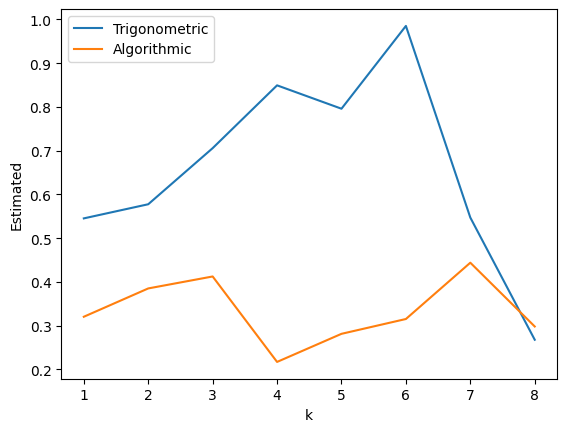

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


def generate_data(size=10):
    
    xs = np.random.uniform(0, 1, size=size)
    ys = xs**2 + 0.1 * xs + np.random.normal(0, 0.5, size=size)
    return xs, ys


def cos_x_k(xs, k):
    size = xs.size
    cos_xs = np.array([])
    for x in xs:
        cos_x = np.array([])
        for i in range(1, k + 1):
            cos_x = np.append(cos_x, np.cos(2 * np.pi * x * i))
        cos_xs = np.append(cos_xs, cos_x)
    return cos_xs.reshape(size, k)


def mul_x_k(xs, k):
    size = xs.size
    mul_xs = np.array([])
    for x in xs:
        mul_x = np.array([])
        for i in range(1, k + 1):
            mul_x = np.append(mul_x, x**i)
        mul_xs = np.append(mul_xs, mul_x)
    return mul_xs.reshape(size, k)


def train(xs, ys, func):
    SC = []
    average = []
    for k in range(1, data_set_size - 1):
        model = LinearRegression()
        model.fit(func(xs, k), ys)
        prediction = model.predict(func(xs, k))
        loss = mean_squared_error(ys, prediction)
        average.append(regression(k, data_set_size, loss))
        sc = scf(k, data_set_size)
        SC.append(sc)

    min_idx = np.argmin(average)
    print("k: ", min_idx + 1)
    print("Estimated: ", average[min_idx])
    print(SC)

    return average

def scf(dof, n):
    p = dof / n
    return (1 + p * ((1 - p) ** -1) * np.log(n)) 

def regression(dof, n, loss):
    p = dof / n
    return (1 + p * ((1 - p) ** -1) * np.log(n)) * loss


if __name__ == "__main__":
    data_set_size = 10
    xs, ys = generate_data(data_set_size)

    avg_tri = train(xs, ys, cos_x_k)
    avg_alg = train(xs, ys, mul_x_k)
    plt.plot([x for x in range(1, len(avg_tri) + 1)], avg_tri, label="Trigonometric")
    plt.plot([x for x in range(1, len(avg_alg) + 1)], avg_alg, label="Algorithmic")
    plt.legend()

    plt.xlabel("k")
    plt.ylabel("Estimated")
    plt.savefig("p3.png")